In [6]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
import pickle
import dask.dataframe as dd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import subprocess
import random

import statsmodels.api as sm 


In [7]:
## blocks

In [2]:
dict_blocks = '/home/tbellagio/HapFM/blocks_snpsid_dict.pkl'

with open(dict_blocks, 'rb') as file:
    dict_blocks = pickle.load(file)

reverse_mapping = {item: key for key, values in dict_blocks.items() for item in values}

NameError: name 'pickle' is not defined

In [ ]:
wd = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full_last_gen/lfmm_fullresults_all_k/'
pvalues_files = [i for i in os.listdir(wd) if 'wo_calibration_pvalue_full_genome' in i]

In [7]:
pvalues_files

['wo_calibration_pvalue_full_genome_bio17_k16.csv',
 'wo_calibration_pvalue_full_genome_bio13_k16.csv',
 'wo_calibration_pvalue_full_genome_bio8_k16.csv',
 'wo_calibration_pvalue_full_genome_bio4_k16.csv',
 'wo_calibration_pvalue_full_genome_bio1_k16.csv',
 'wo_calibration_pvalue_full_genome_bio5_k16.csv',
 'wo_calibration_pvalue_full_genome_bio9_k16.csv',
 'wo_calibration_pvalue_full_genome_bio16_k16.csv',
 'wo_calibration_pvalue_full_genome_bio12_k16.csv',
 'wo_calibration_pvalue_full_genome_bio3_k16.csv',
 'wo_calibration_pvalue_full_genome_bio7_k16.csv',
 'wo_calibration_pvalue_full_genome_bio14_k16.csv',
 'wo_calibration_pvalue_full_genome_bio10_k16.csv',
 'wo_calibration_pvalue_full_genome_bio18_k16.csv',
 'wo_calibration_pvalue_full_genome_bio19_k16.csv',
 'wo_calibration_pvalue_full_genome_bio15_k16.csv',
 'wo_calibration_pvalue_full_genome_bio11_k16.csv',
 'wo_calibration_pvalue_full_genome_bio2_k16.csv',
 'wo_calibration_pvalue_full_genome_bio6_k16.csv']

In [8]:
dict_snps = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/key_files/var_pos_grenenet.csv'
dict_snps = pd.read_csv(dict_snps)

In [9]:
dict_snps = dict_snps[dict_snps['total_alleles05filter_lastgen'].notna()].reset_index(drop=True)

In [10]:
## to create results files 
for pvalues_file in pvalues_files:
    kvalue = pvalues_file.split('_')[-1].replace('.csv', '')
    biovar = pvalues_file.split('_')[-2].replace('.csv', '')
    print(biovar)
    pvalues = dd.read_csv(wd + pvalues_file)
    pvalues = pvalues.compute().drop('Unnamed: 0', axis=1)
    pvalues = pd.concat([dict_snps['id'],pvalues],axis=1)
    th = 0.05/len(pvalues)
    pvalues['significant'] = pvalues[biovar] <= th
    pvalues['block'] = pvalues['id'].map(reverse_mapping) #.fillna(df['values'])
    pvalues.columns = ['snp_id', 'p_value', 'significant', 'block']
    pvalues.to_csv(wd + f'lfmm_{biovar}_{kvalue}_results.csv',index=None)

bio17
bio13
bio8
bio4
bio1
bio5
bio9
bio16
bio12
bio3
bio7
bio14
bio10
bio18
bio19
bio15
bio11
bio2
bio6


In [13]:
pvalues_files

['wo_calibration_pvalue_full_genome_bio17_k16.csv',
 'wo_calibration_pvalue_full_genome_bio1_k16.csv',
 'wo_calibration_pvalue_full_genome_bio12_k16.csv',
 'wo_calibration_pvalue_full_genome_bio18_k16.csv']

In [ ]:
for pvalues_file in pvalues_files:
    biovar = pvalues_file.split('_')[-1].replace('.csv', '')
    print(biovar)
    pvalues = dd.read_csv(wd + pvalues_file)
    pvalues = pvalues.compute().drop('Unnamed: 0', axis=1)
    pvalues = pd.concat([dict_snps['id'],pvalues],axis=1)
    th = 0.05/len(pvalues)
    pvalues['significant'] = pvalues[biovar] < th
    pvalues['block'] = pvalues['id'].map(reverse_mapping) #.fillna(df['values'])
    sign_blocks = pvalues.groupby('block')[biovar].min().reset_index()
    sign_blocks.to_csv(f'sign_blocks_{biovar}.csv', index=None)
    print(len(sign_blocks))

In [11]:
clim_sites_during_exp = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/grene/data/bioclimvars_experimental_sites_era5.csv')
biovars = clim_sites_during_exp.columns[1:]

In [17]:
### MANHATTAN PLOTS

In [12]:
clim_sites_during_exp = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/grene/data/bioclimvars_experimental_sites_era5.csv')
biovars = clim_sites_during_exp.columns[1:]

In [13]:
dict_snps = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/key_files/var_pos_grenenet.csv'
dict_snps = pd.read_csv(dict_snps)

In [14]:
wd

'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full_last_gen/lfmm_fullresults_all_k/'

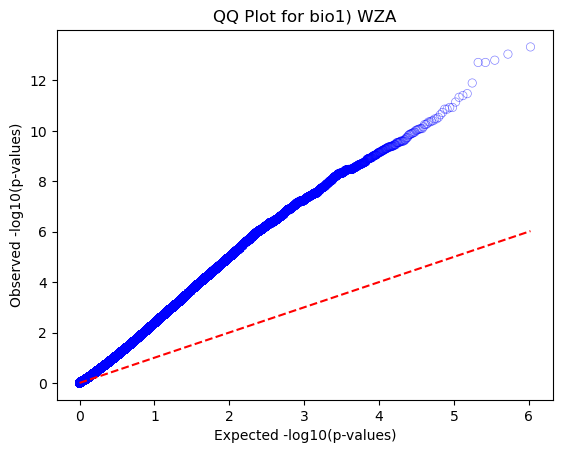

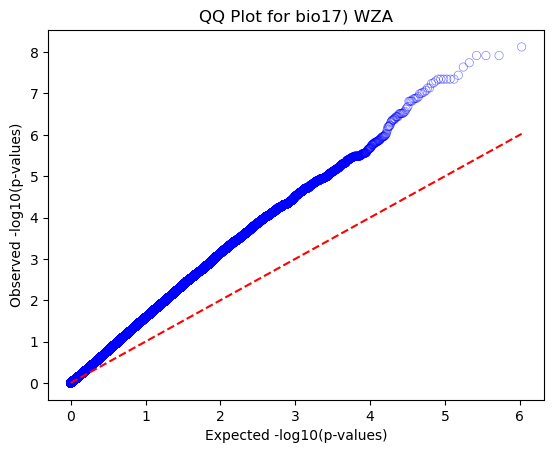

In [37]:
for biovar in biovars:
    pvalues_file = f'wo_calibration_pvalue_full_genome_{biovar}_k25.csv'
    pvalues = dd.read_csv(wd + pvalues_file)
    pvalues = pvalues.compute().drop('Unnamed: 0', axis=1)
    pvalues.columns = ['pvalue']
    observed_quantiles = -np.log10(np.sort(pvalues['pvalue'].values))
    
    # Expected quantiles from the uniform distribution
    expected_quantiles = -np.log10(np.linspace(1 / len(pvalues), 1, len(pvalues)))
    
    # QQ plot
    sns.scatterplot(x = expected_quantiles, y = observed_quantiles, edgecolor='b', facecolor='none', alpha=0.5)
    plt.plot([min(expected_quantiles), max(expected_quantiles)], [min(expected_quantiles), max(expected_quantiles)], 'r--')
    
    plt.xlabel("Expected -log10(p-values)")
    plt.ylabel("Observed -log10(p-values)")
    plt.title(f'QQ Plot for lfmm {biovar}')
    
    plt.show()

In [8]:
kvalue = 'k16'

In [9]:
biovar = 'bio18'
wd = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full_last_gen/lfmm_fullresults_all_k/'

In [10]:
pvalues_file = wd + f'lfmm_{biovar}_{kvalue}_results.csv'
lfmm = pd.read_csv(pvalues_file)

In [11]:
lfmm = lfmm.sort_values('p_value').head(100)

In [12]:
import pickle
dict_blocks = '../key_files/blocks_snpsid_dict.pkl'

with open(dict_blocks, 'rb') as file:
    dict_blocks = pickle.load(file)

reverse_mapping = {item: key for key, values in dict_blocks.items() for item in values}

In [13]:
lfmm['block'] = lfmm['snp_id'].map(reverse_mapping)

In [14]:
lfmm = lfmm.drop_duplicates('block')

In [16]:
lfmm.to_csv(f'top_hits_lfmm_last_gen_{biovar}.csv')

In [17]:
lfmm

snp_id       p_value  significant   block
579048   3_17507676  1.252322e-08         True  3_2534
873578    5_8563740  1.348561e-08         True   5_724
536749   3_11269463  1.408702e-08         True  3_1424
675144    4_5995723  1.968770e-08         True   4_541
997432   5_21265916  2.897531e-08         True  5_2404
582613   3_17885659  3.453334e-08         True  3_2664
808199    5_1060165  6.399749e-08        False   5_180
154694   1_18735314  6.679145e-08        False  1_2527
414103   2_16145883  7.673503e-08        False  2_1644
460015    3_2780819  8.710293e-08        False   3_316
347588    2_8535135  1.037750e-07        False   2_919
1019515  5_23518676  1.047603e-07        False  5_2800
332005    2_7071514  3.110275e-07        False   2_777
161659   1_19424966  3.553483e-07        False  1_2695
186345   1_21966030  5.289471e-07        False  1_3208
887718    5_9755725  5.955097e-07        False   5_819
887708    5_9753488  5.955097e-07        False   5_818
330135    2_6894387  8.364304e-07        False   2_757
898817   5_10991081  8.736355e-07        False   5_905
21984     1_3108928  8.777661e-07        False   1_403
235463   1_25791385  8.923064e-07        False  1_4578
198905   1_22873915  9.596505e-07        False  1_3671
993003   5_20741730  1.061616e-06        False  5_2372
804116     5_759164  1.237128e-06        False   5_106
235953   1_25855003  1.259893e-06        False  1_4587
161693   1_19426195  1.284604e-06        False  1_2697
808440    5_1095092  1.308603e-06        False   5_181
787635   4_17552075  1.363810e-06        False  4_2989
989041   5_20239525  1.475233e-06        False  5_2340
272713   1_30015449  1.488937e-06        False  1_5160

In [ ]:
    # Run PLINK clumping
    plink \
    --bfile /carnegie/nobackup/scratch/tbellagio/gea_grene-net/jacknife_lfmm/clumping/grenenet_og \
    --clump /carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full/clumping/input_clumping_bio9.txt
    --clump-p1 1.5453657571674064e-08 \
    --clump-r2 0.2 \
    --clump-kb 250 \
    --out /carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full/clumping/output/output_clumping_bio9.clumped

In [15]:
biovar='bio1'

In [16]:
pvalues_file = f'wo_calibration_pvalue_full_genome_{biovar}.csv'

In [17]:
input_clumping = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full/clumping/input_clumping_bio9.txt',sep='\s+')

In [50]:
input_clumping[input_clumping['SNP'] == '4_8003037']

SNP         P
2231462  4_8003037  0.000459

In [39]:
pvalues = dd.read_csv(wd + pvalues_file)
pvalues = pvalues.compute().drop('Unnamed: 0', axis=1)

In [45]:
pvalues

bio9
0        0.013193
1        0.111958
2        0.106680
3        0.127010
4        0.920988
...           ...
3235475  0.736052
3235476  0.355897
3235477  0.511958
3235478  0.138595
3235479  0.904483

[3235480 rows x 1 columns]

In [39]:
    pvalues_file = wd + f'lfmm_{biovar}_{kvalue}_results.csv'
    
    pvalues = pd.read_csv(pvalues_file)

In [43]:
pvalues['chrom'] = pvalues['snp_id'].str.split('_').str[0]
pvalues['pos'] = pvalues['snp_id'].str.split('_').str[1]

In [47]:
pvalues

id  pos chrom maf05filter total_alleles05filter snp_id  \
0             1_291  346     1         NaN                   NaN  1_346   
1             1_346  353     1       1_346                 1_346  1_353   
2             1_349  363     1         NaN                   NaN  1_363   
3             1_352  395     1         NaN                   NaN  1_395   
4             1_353  396     1       1_353                 1_353  1_396   
...             ...  ...   ...         ...                   ...    ...   
3235475  5_26975208  NaN   NaN         NaN                   NaN    NaN   
3235476  5_26975215  NaN   NaN         NaN                   NaN    NaN   
3235477  5_26975267  NaN   NaN         NaN                   NaN    NaN   
3235478  5_26975272  NaN   NaN  5_26975272            5_26975272    NaN   
3235479  5_26975288  NaN   NaN  5_26975288            5_26975288    NaN   

          p_value significant block  
0        0.765751       False   1_0  
1        0.023993       False   1_0  
2        0.697004       False   1_0  
3        0.741758       False   1_0  
4        0.741758       False   1_0  
...           ...         ...   ...  
3235475       NaN         NaN   NaN  
3235476       NaN         NaN   NaN  
3235477       NaN         NaN   NaN  
3235478       NaN         NaN   NaN  
3235479       NaN         NaN   NaN  

[3235480 rows x 9 columns]

In [21]:
blocks_deleted = ['1_2123', '1_2134', '1_5160', '2_1264', '2_1434', '2_1498',
       '2_576', '2_973', '3_518', '3_551', '4_234', '5_274', '5_3006',
       '5_331', '5_542', '5_602', '5_724', '5_775', '5_891', '5_918',
       '5_923']

In [36]:
to_mark = df[df['block'].isin(blocks_deleted)].drop_duplicates('block')['id'].values

In [6]:
to_mark = ['4_2320']

In [22]:
kvalue='k16'

In [27]:
wd

'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full_last_gen/lfmm_fullresults_all_k/'

/tmp/ipykernel_1103229/1909954823.py:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


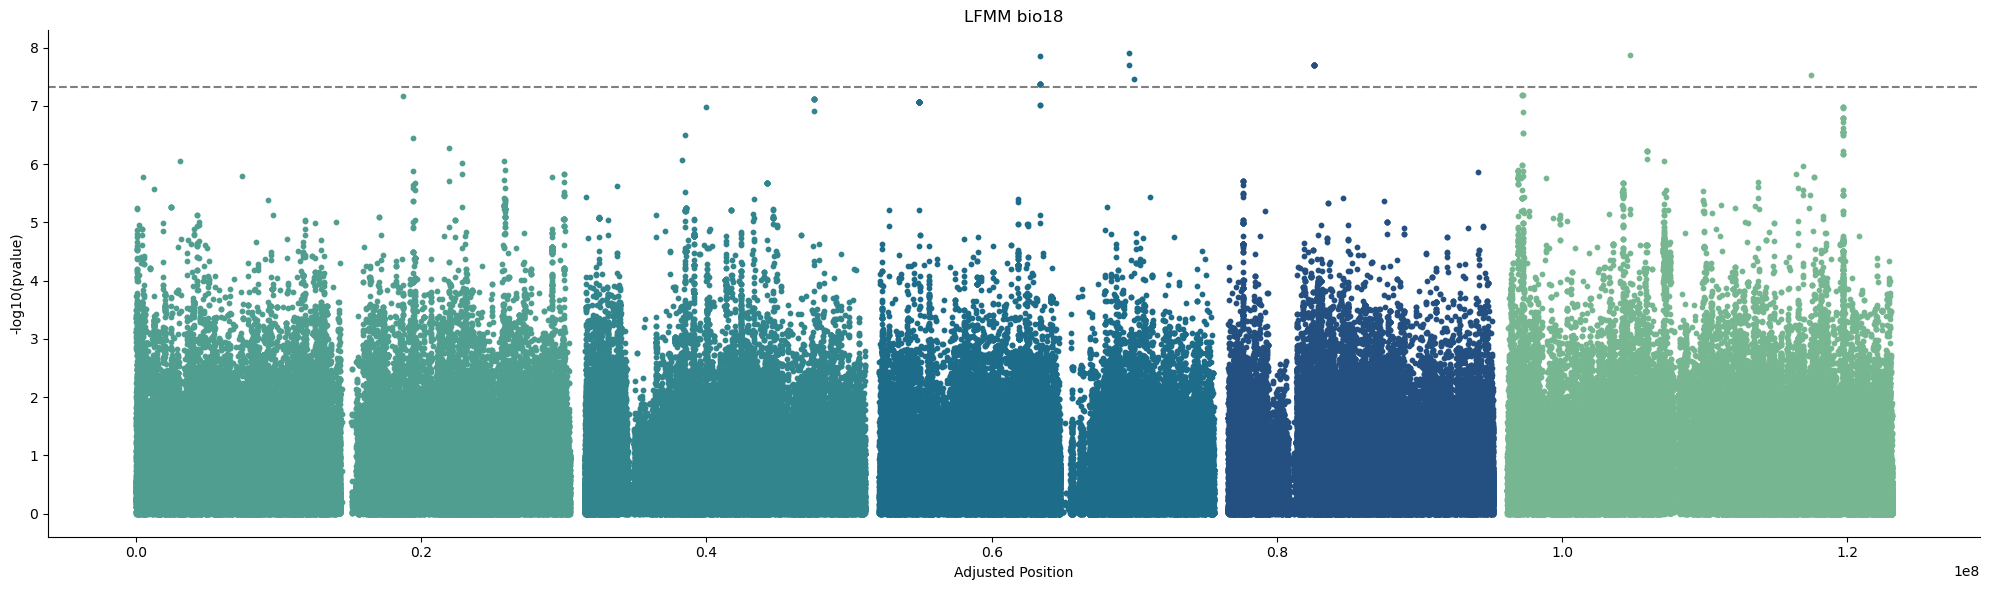

In [20]:
for biovar in ['bio18']:
    #clump= pd.read_csv(f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full/clumping/output/output_clumping_{biovar}.clumped', sep='\s+')
    pvalues_file = wd + f'lfmm_{biovar}_{kvalue}_results.csv'
    
    pvalues = pd.read_csv(pvalues_file)

    pvalues['chrom'] = pvalues['snp_id'].str.split('_').str[0].astype(int)
    pvalues['pos'] = pvalues['snp_id'].str.split('_').str[1].astype(int)
    
    pvalues.columns = ['id', 'pvalue', 'sign', 'block', 'chrom', 'pos']
    
    threshold_value = 0.05 / len(pvalues)
    
    #sm.qqplot(pvalues['pvalue'], line ='45') 
    #py.show() 
    
    df = pvalues.copy()
    
    colors = sns.color_palette("crest", n_colors = 5)
    
    # Parsing chromosome number and position
    df['chromosome'] = df['chrom']
    df['position'] = df['pos']
    df['-log10(pvalue)'] = -np.log10(df['pvalue'])
    
    # Calculate the offset for each chromosome to prevent overlap
    chromosome_offsets = {}
    offset = 0
    for chrom in sorted(df['chromosome'].unique()):
        chromosome_offsets[chrom] = offset
        max_position = df[df['chromosome'] == chrom]['position'].max()
        offset += max_position + 1000000  # Adding 1 million as a buffer between chromosomes
    
    # Apply offsets to positions
    df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)
    
    # Creating the Manhattan plot
    plt.figure(figsize=(20, 6))
    
    for chrom in sorted(df['chromosome'].unique()):
        subset = df[df['chromosome'] == chrom]
        plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)

    # Highlight clumped SNPs
    #clumped_subset = df[df['id'].isin(clump['SNP'])]
    #plt.scatter(clumped_subset['adjusted_position'], clumped_subset['-log10(pvalue)'], s=50, facecolors='none', edgecolors='grey', linewidths=2, label='Clumped SNPs')
    
    # Aesthetics
    plt.xlabel('Adjusted Position')
    plt.ylabel('-log10(pvalue)')
    #plt.title('Manhattan Plot')
    #plt.grid(axis='y')
    #plt.legend(title="Chromosome", bbox_to_anchor=(1.05, 1), loc='upper left')
    ax = plt.gca()  # Get current axes
    ax.spines['top'].set_visible(False)  # Remove the top spine
    ax.spines['right'].set_visible(False)
    # Threshold line (optional)
    threshold = -np.log10(threshold_value)
    plt.axhline(y=threshold, color='grey', linestyle='dashed')
    plt.title(f'LFMM {biovar}')  # Set the title

    # Show the plot
    plt.tight_layout()
    #plt.savefig(wd + f'manhattan_{biovar}.png')
    plt.show()

In [ ]:
aquaporin: 19424944 - 19425928

In [24]:
df[(df['chromosome'] == 1) & ()]

id    pvalue   sign   block  chrom       pos  chromosome  \
0            1_346  0.000442  False     1_0      1       346           1   
1            1_353  0.414124  False     1_0      1       353           1   
2            1_363  0.272681  False     1_0      1       363           1   
3            1_395  0.584712  False     1_0      1       395           1   
4            1_396  0.584712  False     1_0      1       396           1   
...            ...       ...    ...     ...    ...       ...         ...   
275036  1_30417951  0.115306  False  1_5170      1  30417951           1   
275037  1_30417973  0.115306  False  1_5170      1  30417973           1   
275038  1_30418223  0.115306  False  1_5170      1  30418223           1   
275039  1_30418238  0.115306  False  1_5170      1  30418238           1   
275040  1_30418248  0.417065  False  1_5170      1  30418248           1   

        position  -log10(pvalue)  adjusted_position  
0            346        3.354120                346  
1            353        0.382870                353  
2            363        0.564346                363  
3            395        0.233058                395  
4            396        0.233058                396  
...          ...             ...                ...  
275036  30417951        0.938150           30417951  
275037  30417973        0.938150           30417973  
275038  30418223        0.938150           30418223  
275039  30418238        0.938150           30418238  
275040  30418248        0.379796           30418248  

[275041 rows x 10 columns]

In [21]:
df

id    pvalue   sign   block  chrom       pos  chromosome  \
0             1_346  0.000442  False     1_0      1       346           1   
1             1_353  0.414124  False     1_0      1       353           1   
2             1_363  0.272681  False     1_0      1       363           1   
3             1_395  0.584712  False     1_0      1       395           1   
4             1_396  0.584712  False     1_0      1       396           1   
...             ...       ...    ...     ...    ...       ...         ...   
1048630  5_26975078  0.575808  False  5_3110      5  26975078           5   
1048631  5_26975121  0.274784  False  5_3110      5  26975121           5   
1048632  5_26975148  0.274784  False  5_3110      5  26975148           5   
1048633  5_26975272  0.950299  False  5_3110      5  26975272           5   
1048634  5_26975288  0.624075  False  5_3110      5  26975288           5   

         position  -log10(pvalue)  adjusted_position  
0             346        3.354120                346  
1             353        0.382870                353  
2             363        0.564346                363  
3             395        0.233058                395  
4             396        0.233058                396  
...           ...             ...                ...  
1048630  26975078        0.239723          123134832  
1048631  26975121        0.561009          123134875  
1048632  26975148        0.561009          123134902  
1048633  26975272        0.022140          123135026  
1048634  26975288        0.204763          123135042  

[1048635 rows x 10 columns]

/tmp/ipykernel_1103229/1051856651.py:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


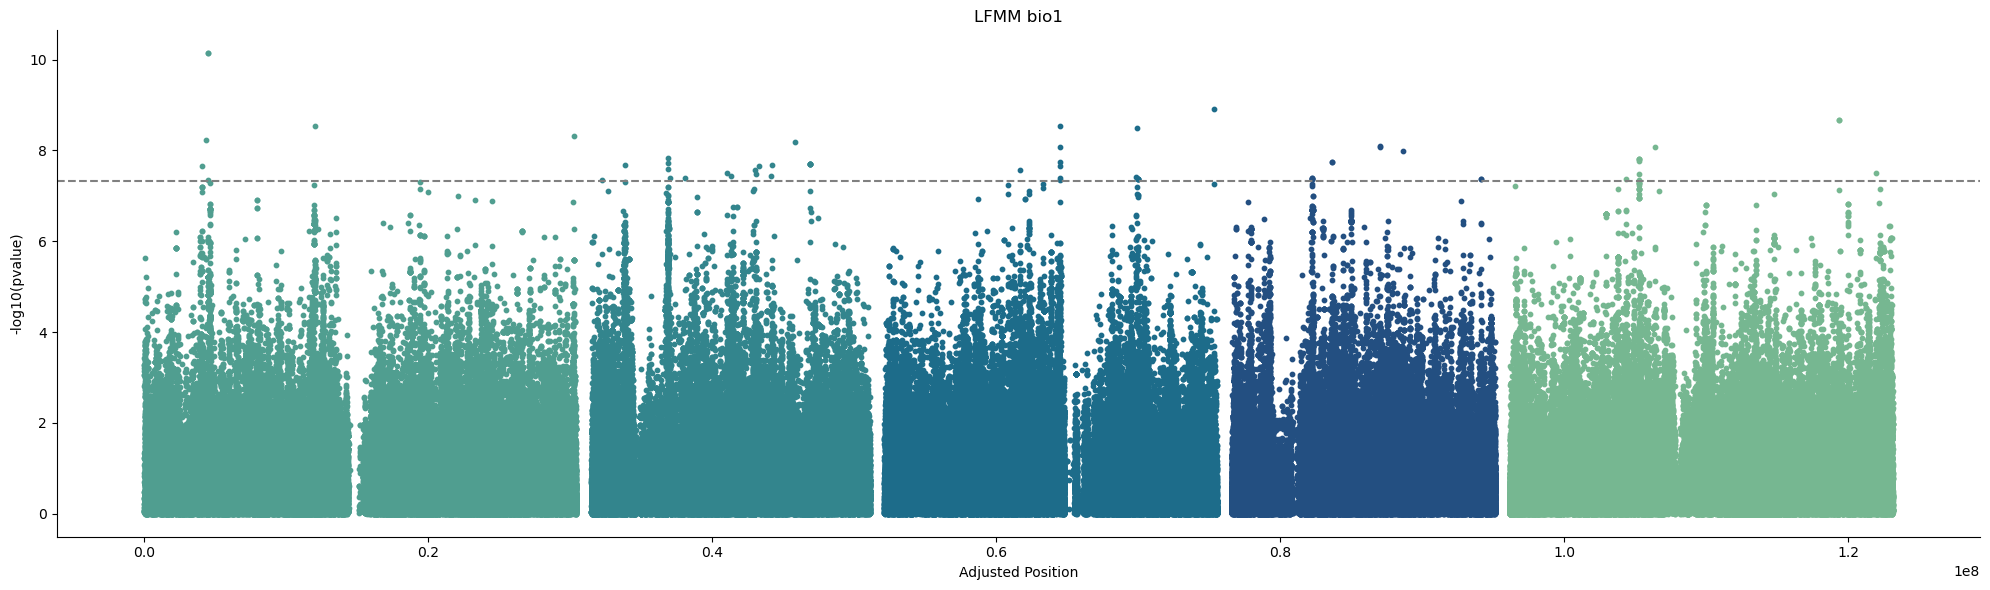

/tmp/ipykernel_1103229/1051856651.py:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


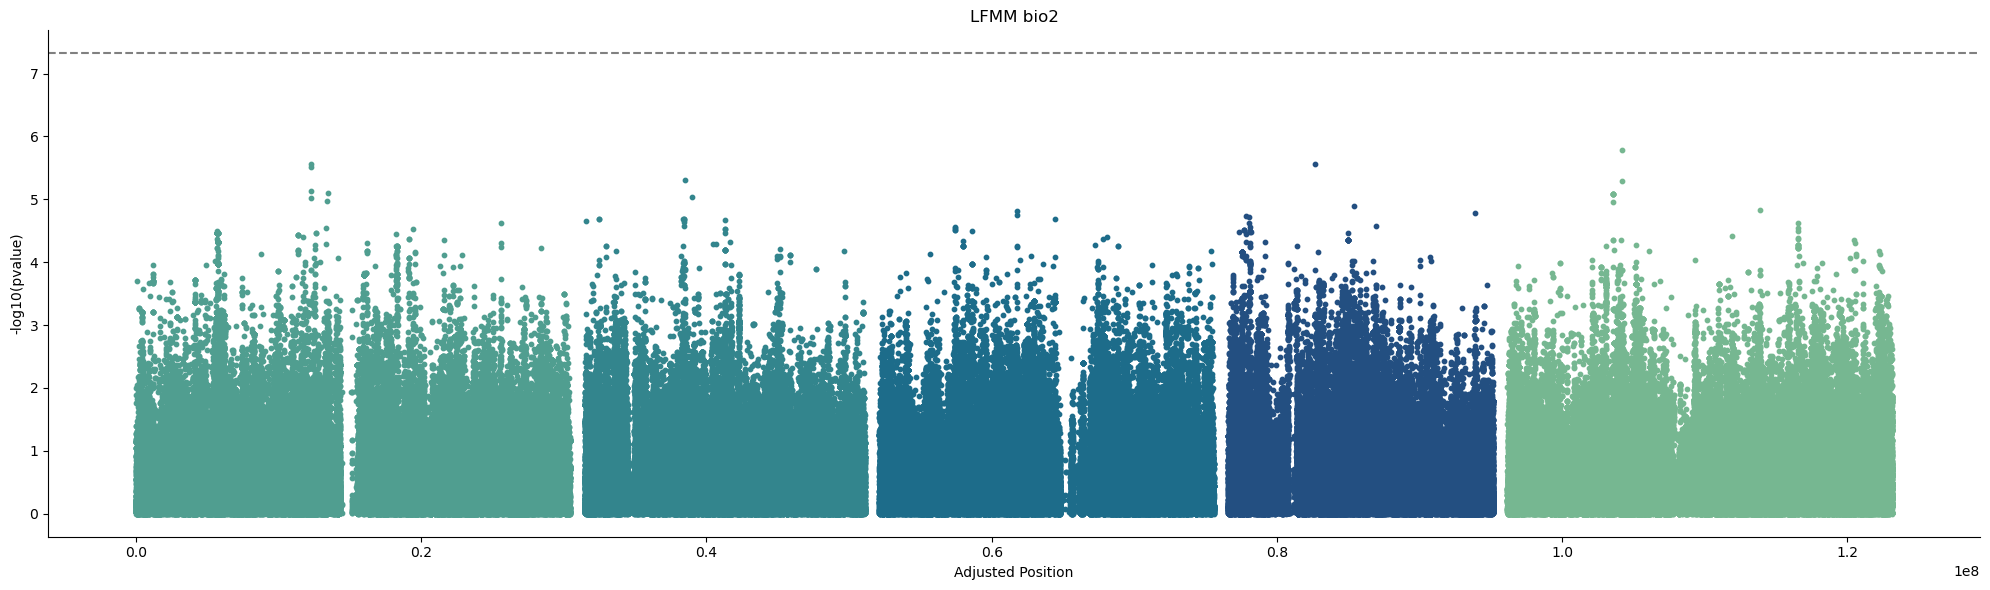

/tmp/ipykernel_1103229/1051856651.py:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


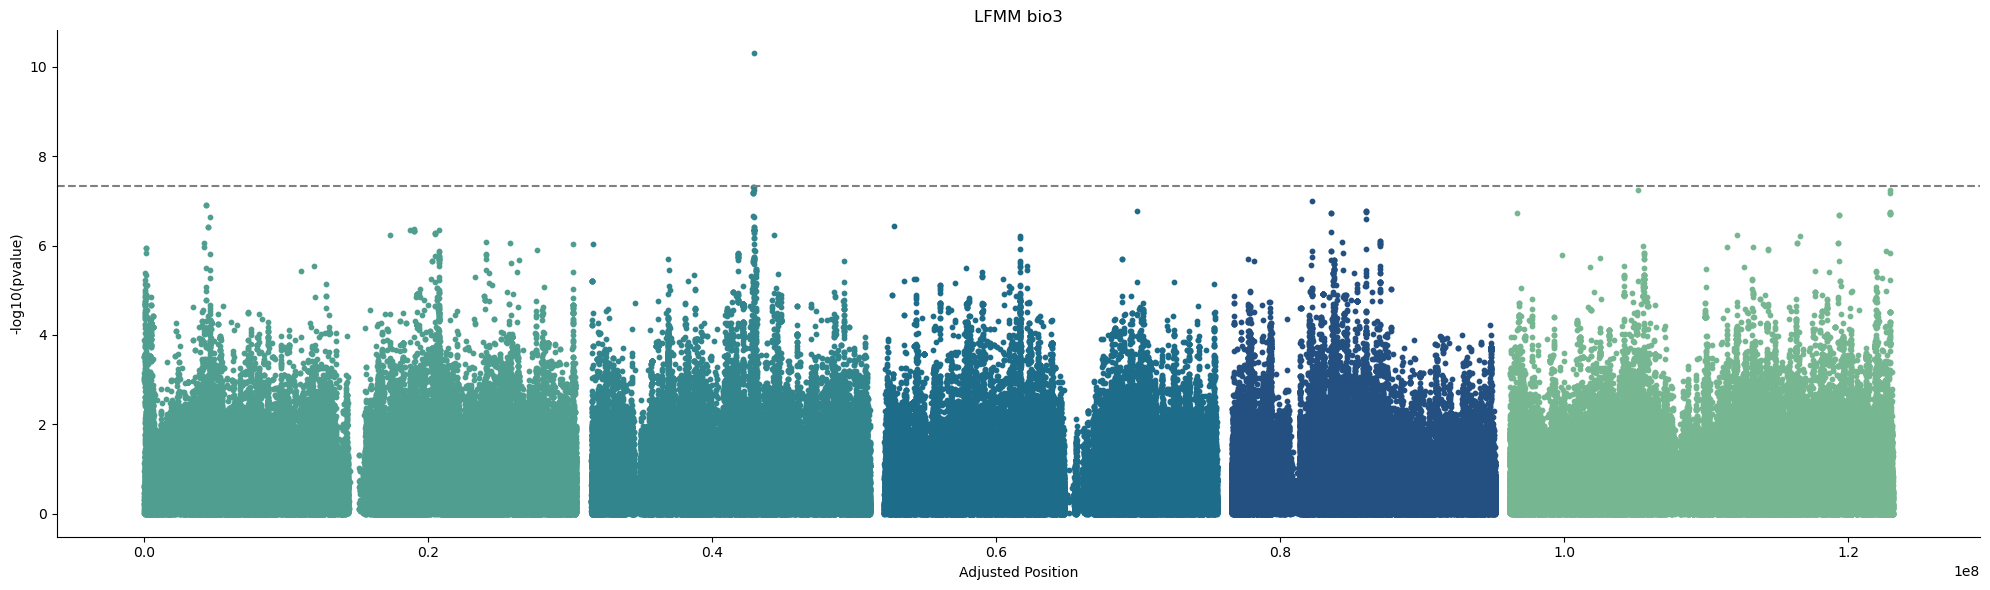

/tmp/ipykernel_1103229/1051856651.py:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


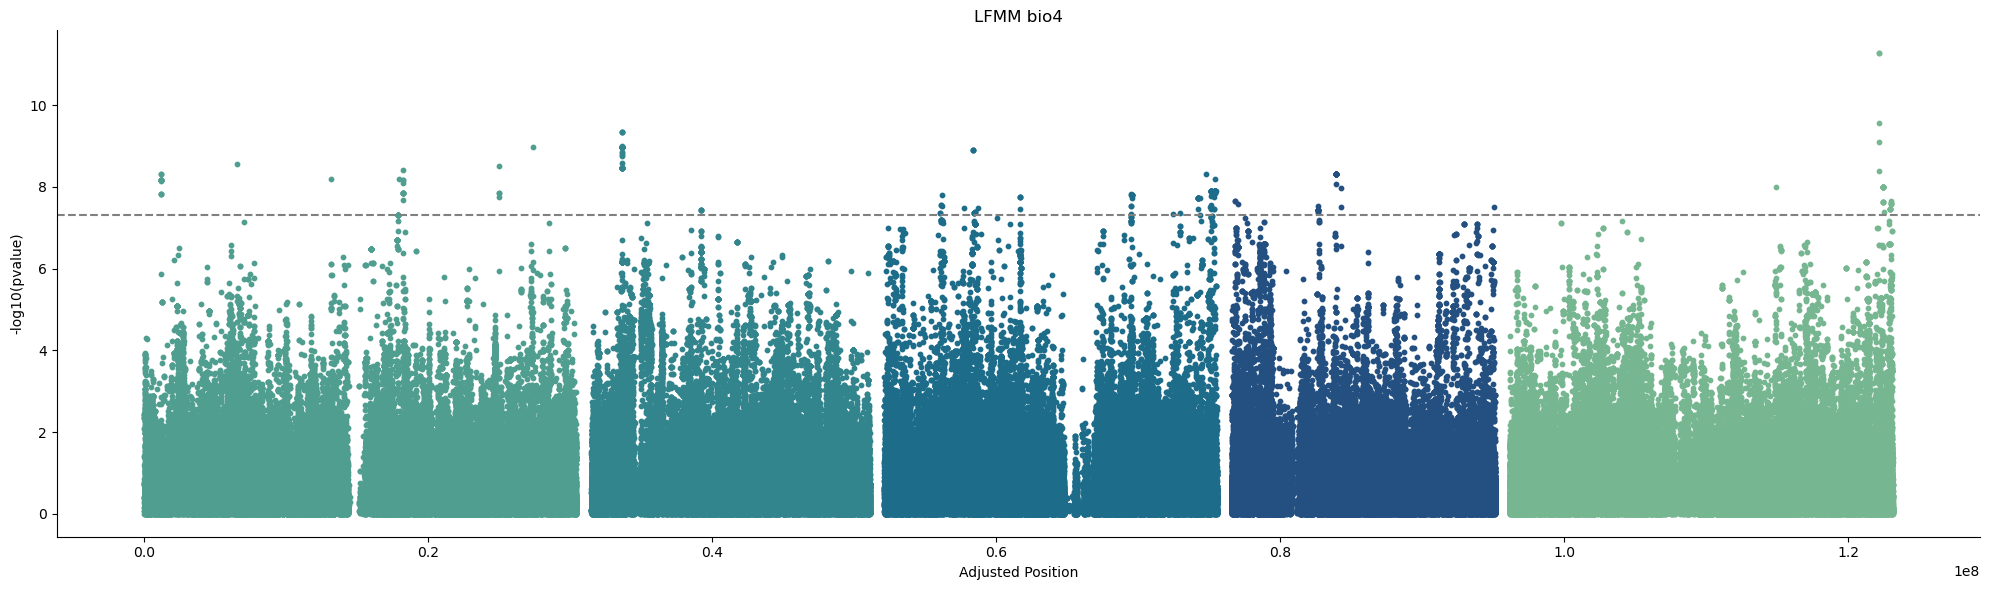

/tmp/ipykernel_1103229/1051856651.py:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


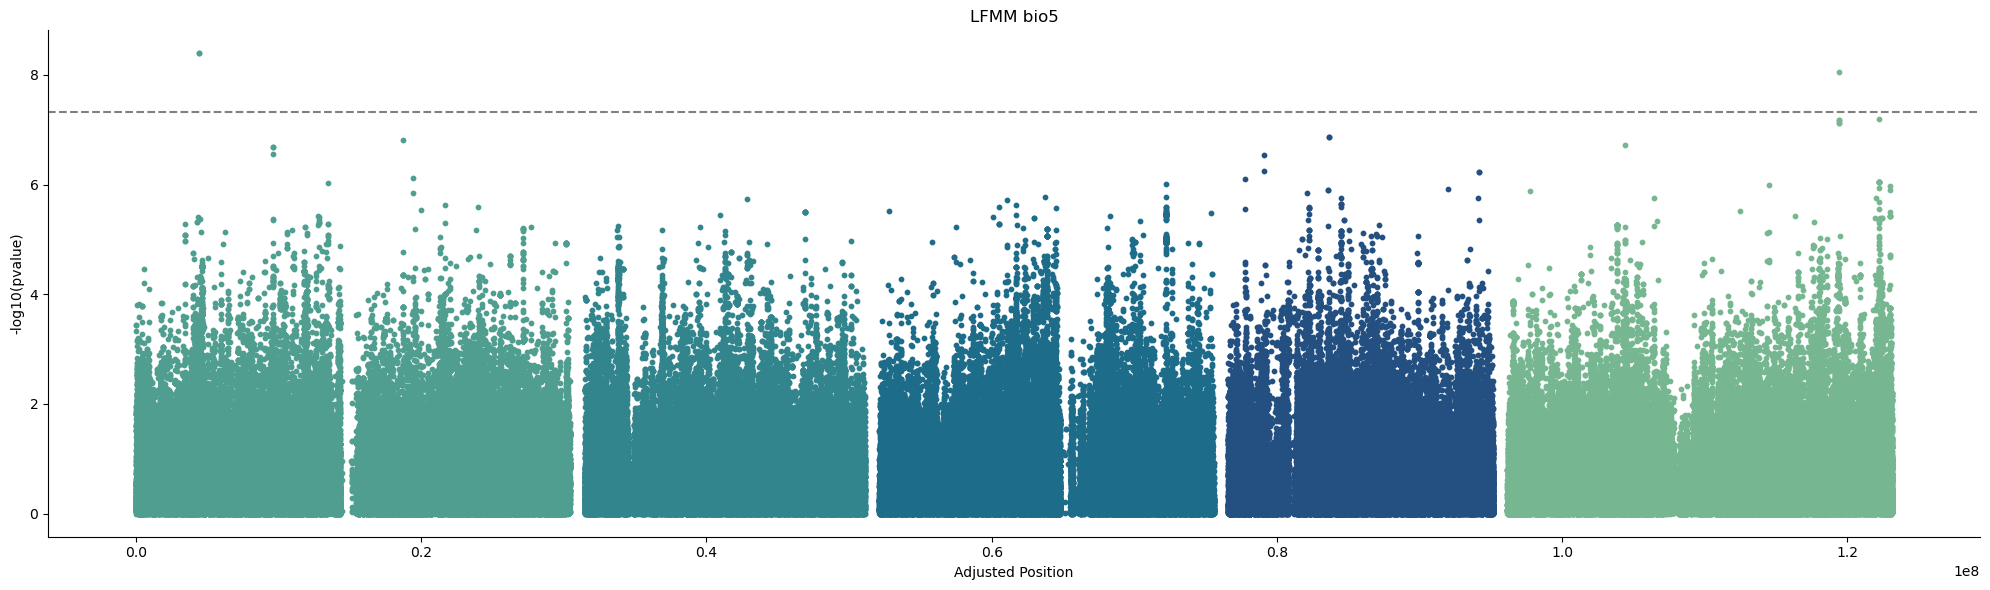

/tmp/ipykernel_1103229/1051856651.py:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


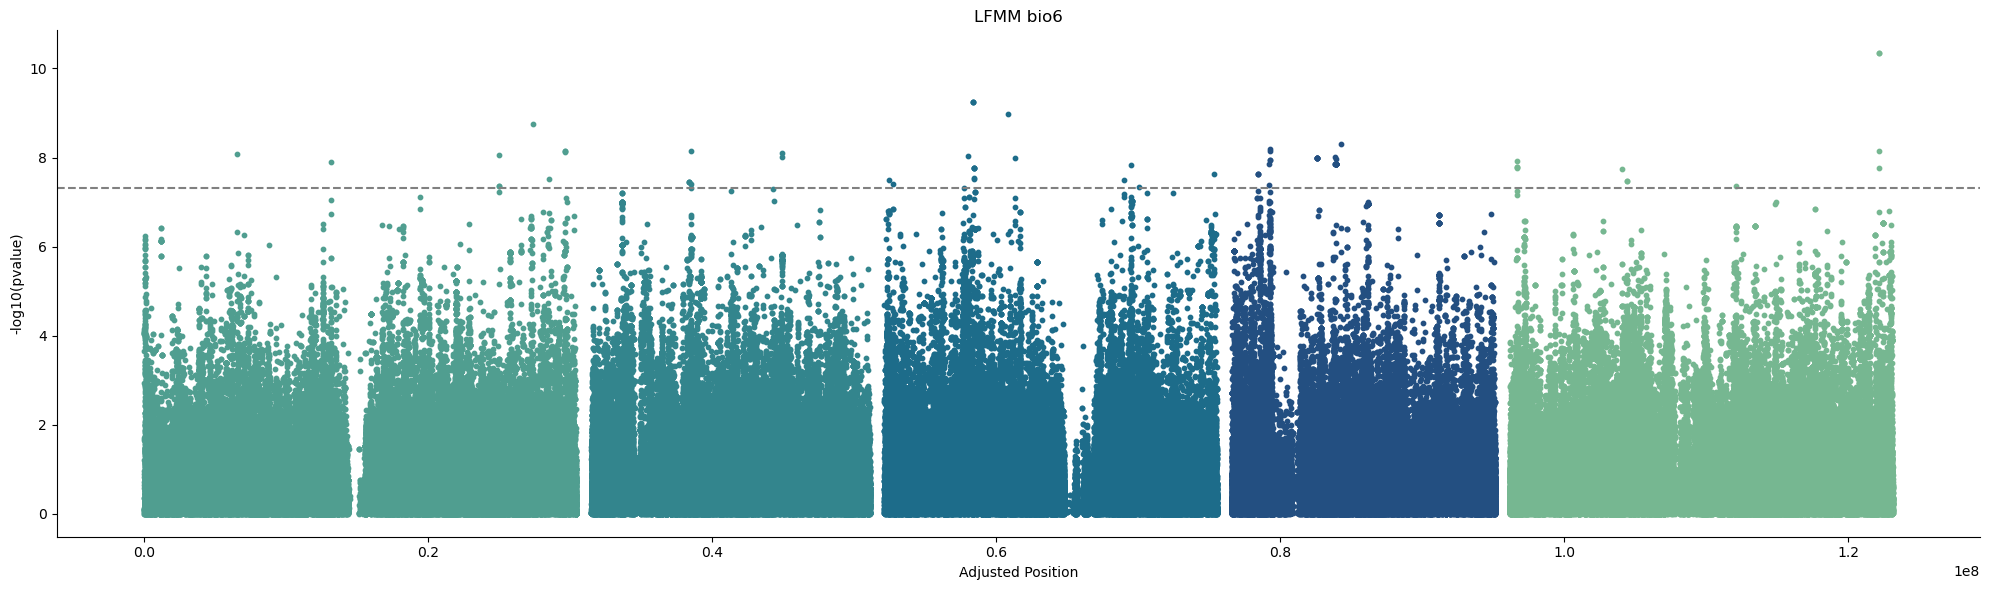

/tmp/ipykernel_1103229/1051856651.py:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


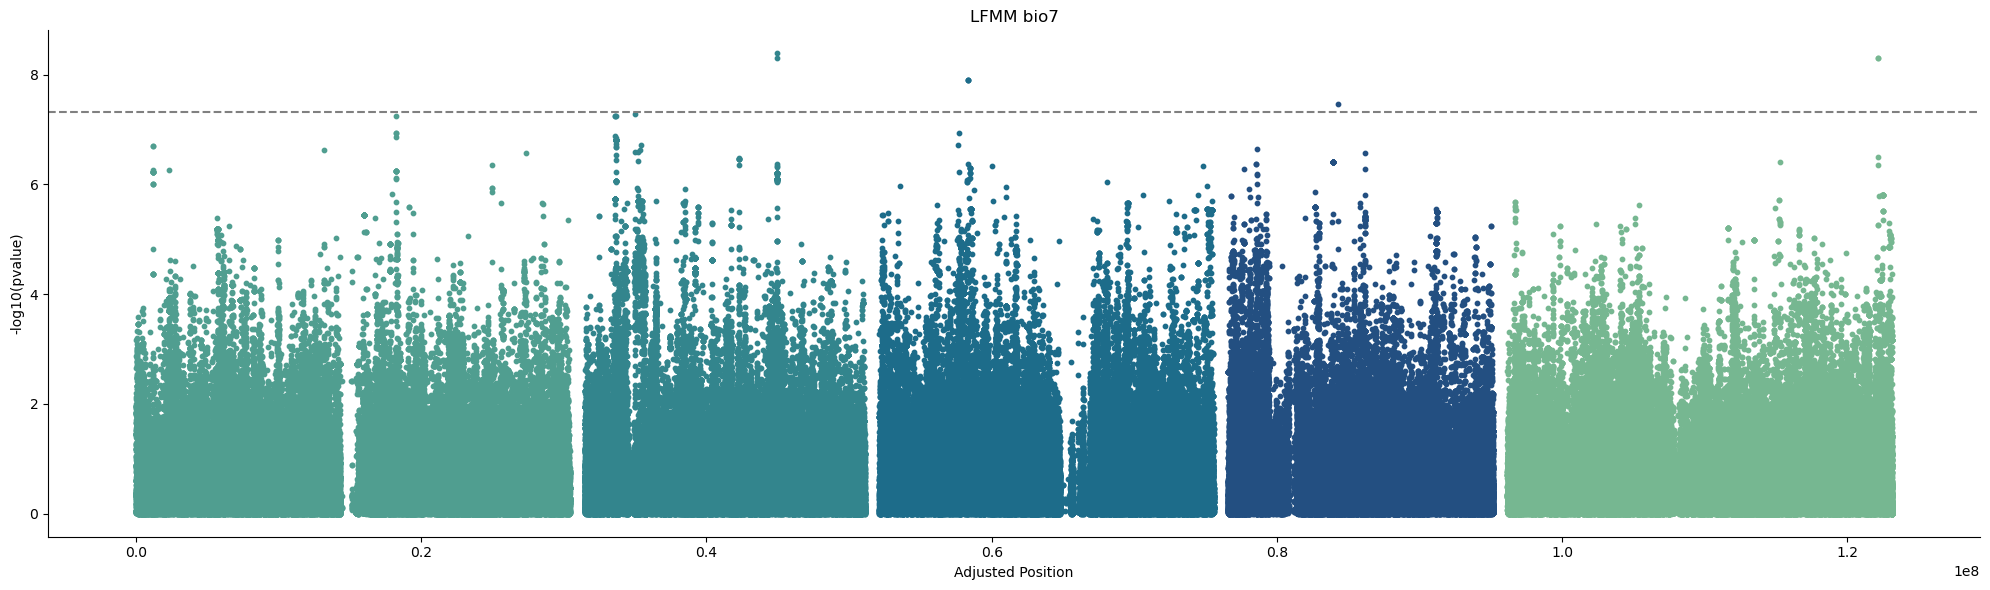

/tmp/ipykernel_1103229/1051856651.py:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


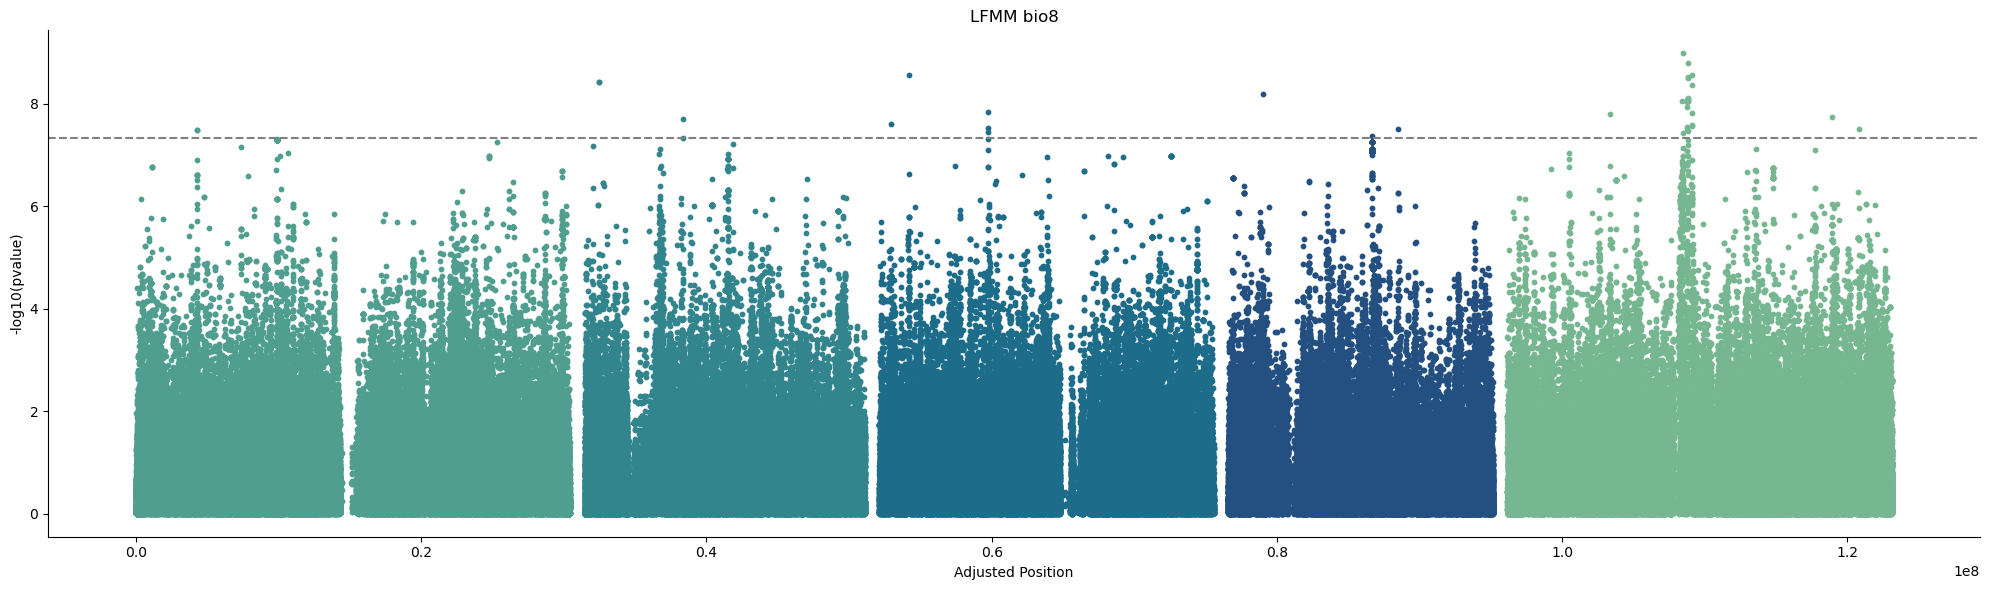

/tmp/ipykernel_1103229/1051856651.py:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


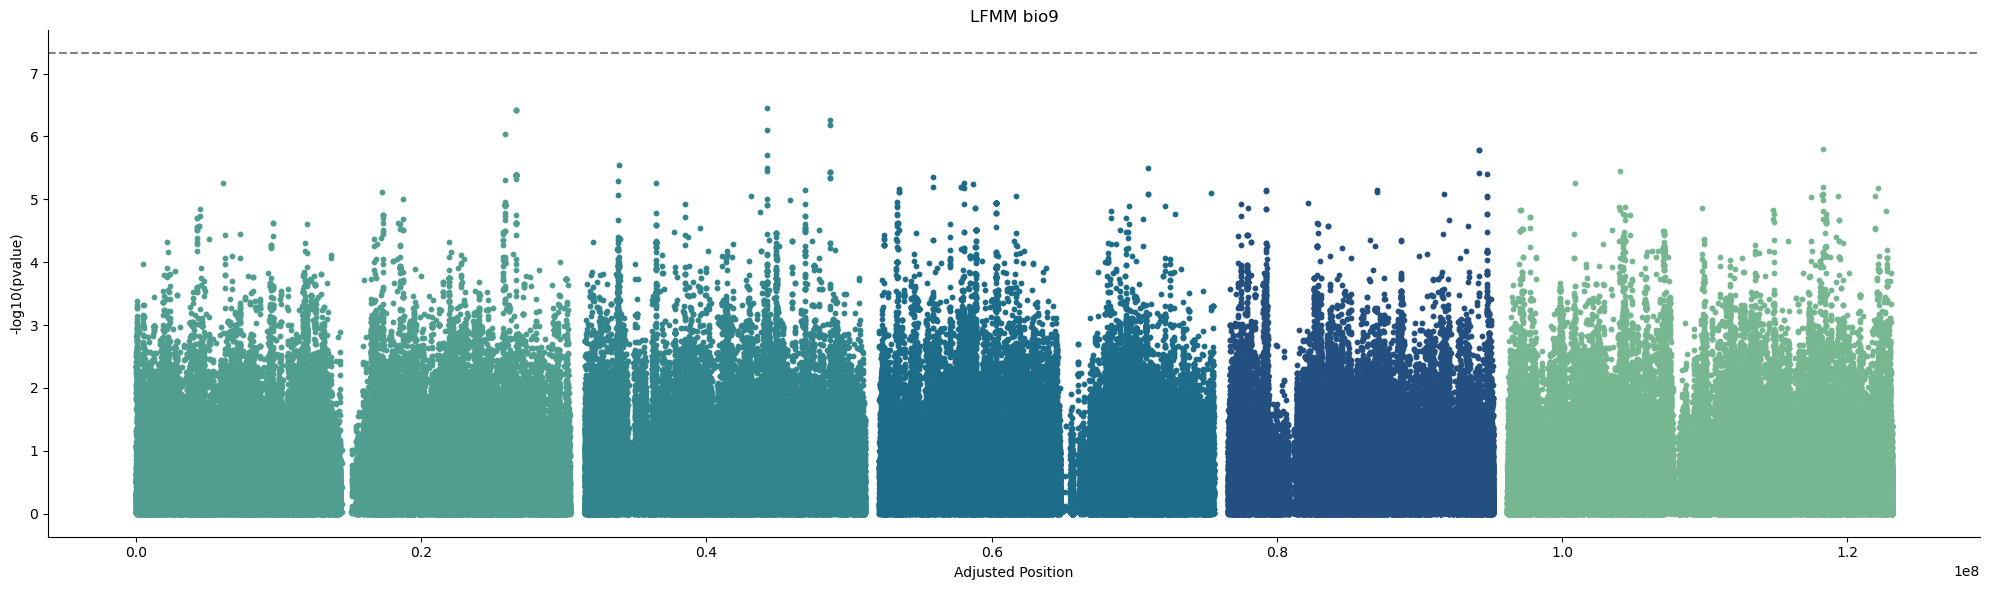

/tmp/ipykernel_1103229/1051856651.py:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


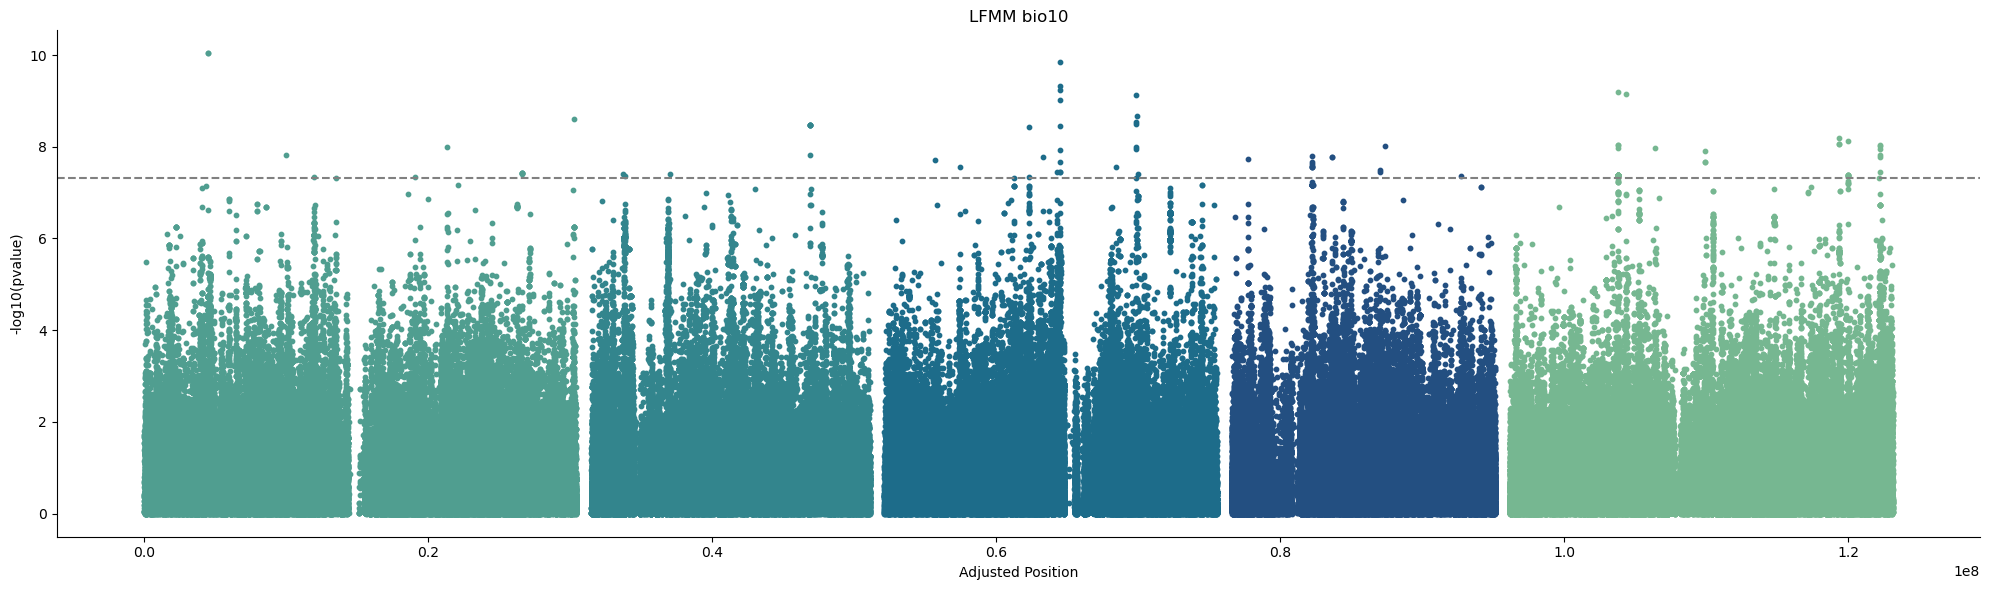

/tmp/ipykernel_1103229/1051856651.py:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


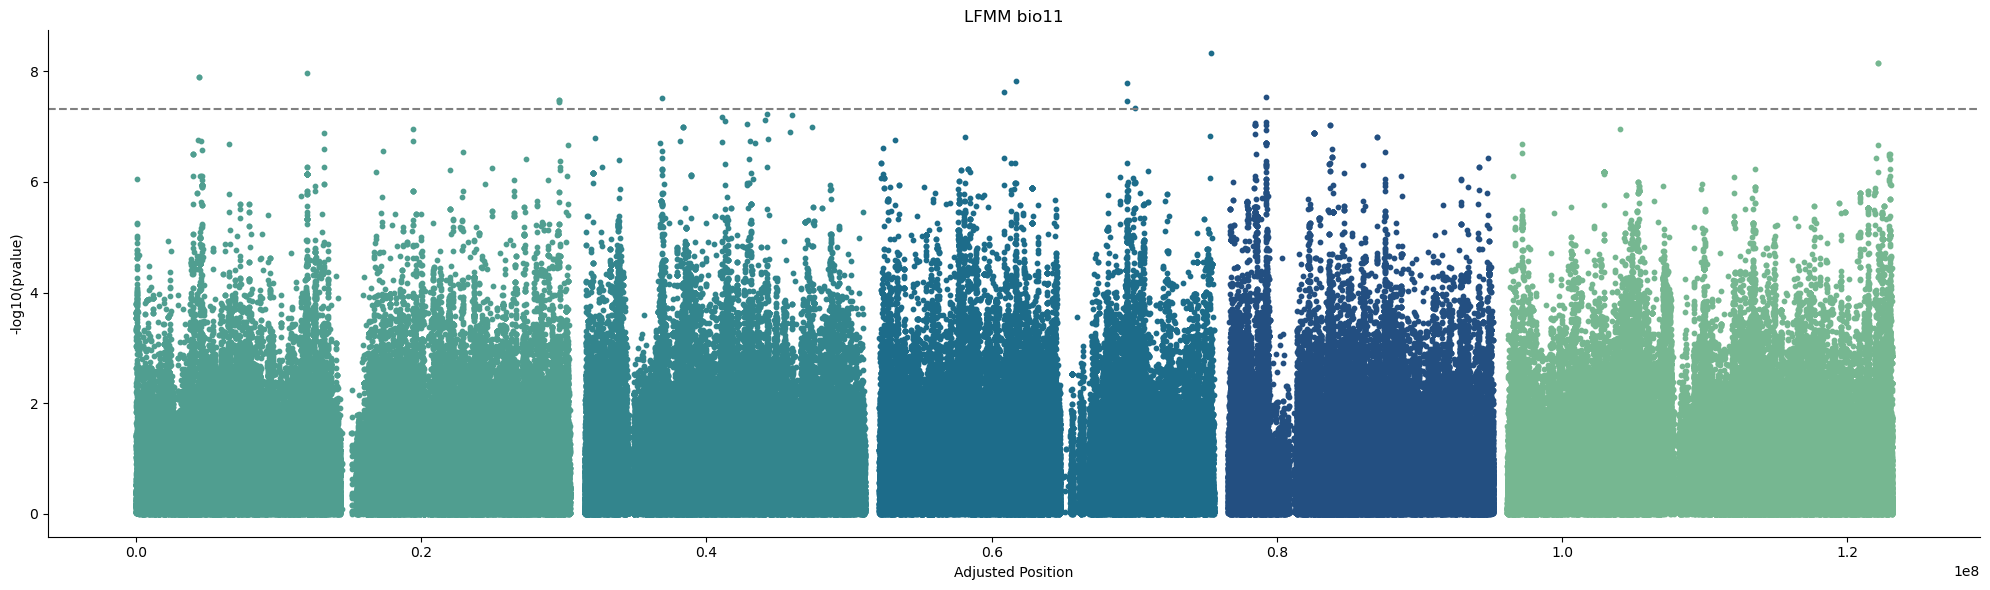

/tmp/ipykernel_1103229/1051856651.py:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


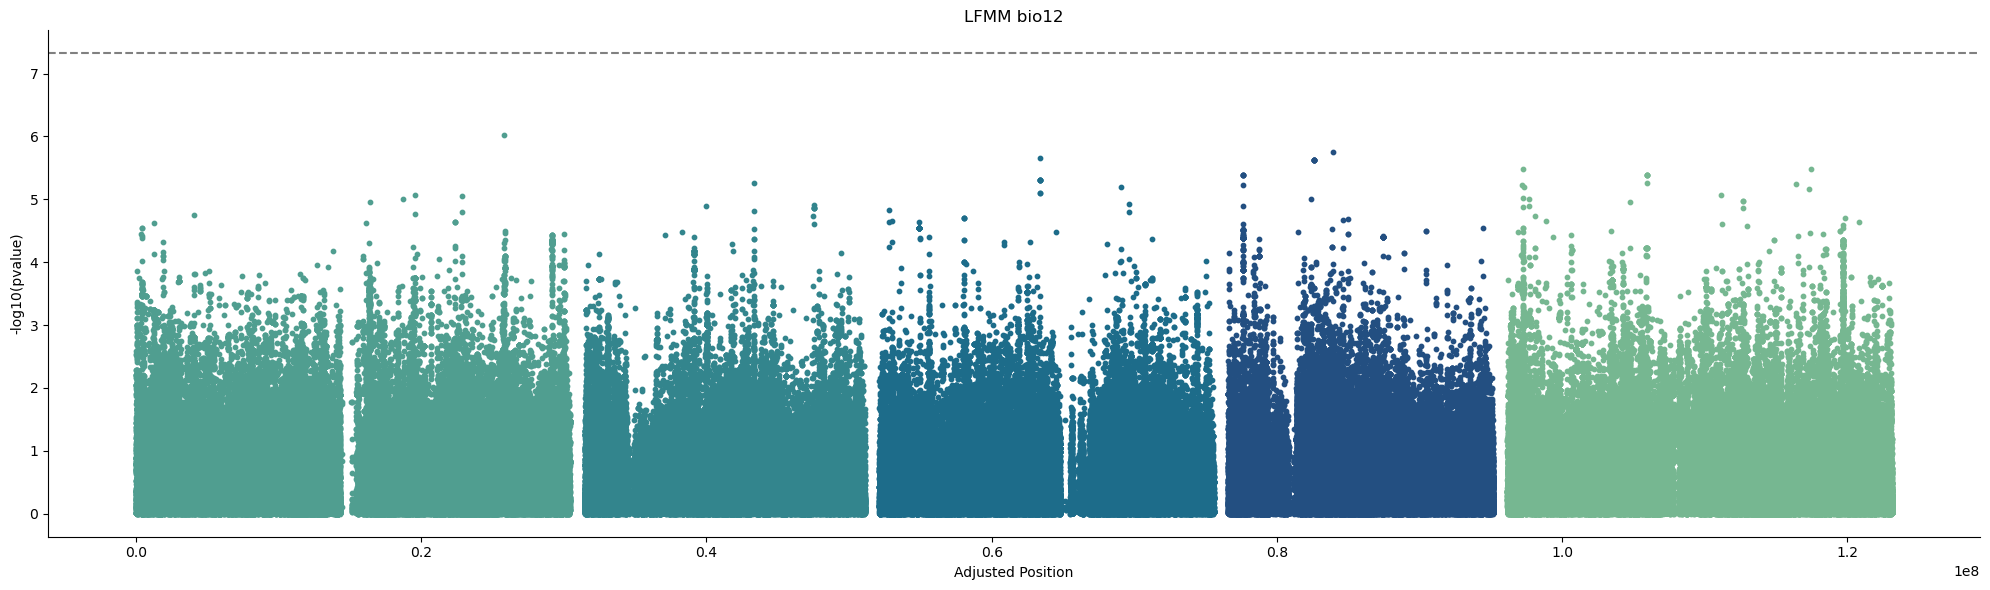

/tmp/ipykernel_1103229/1051856651.py:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


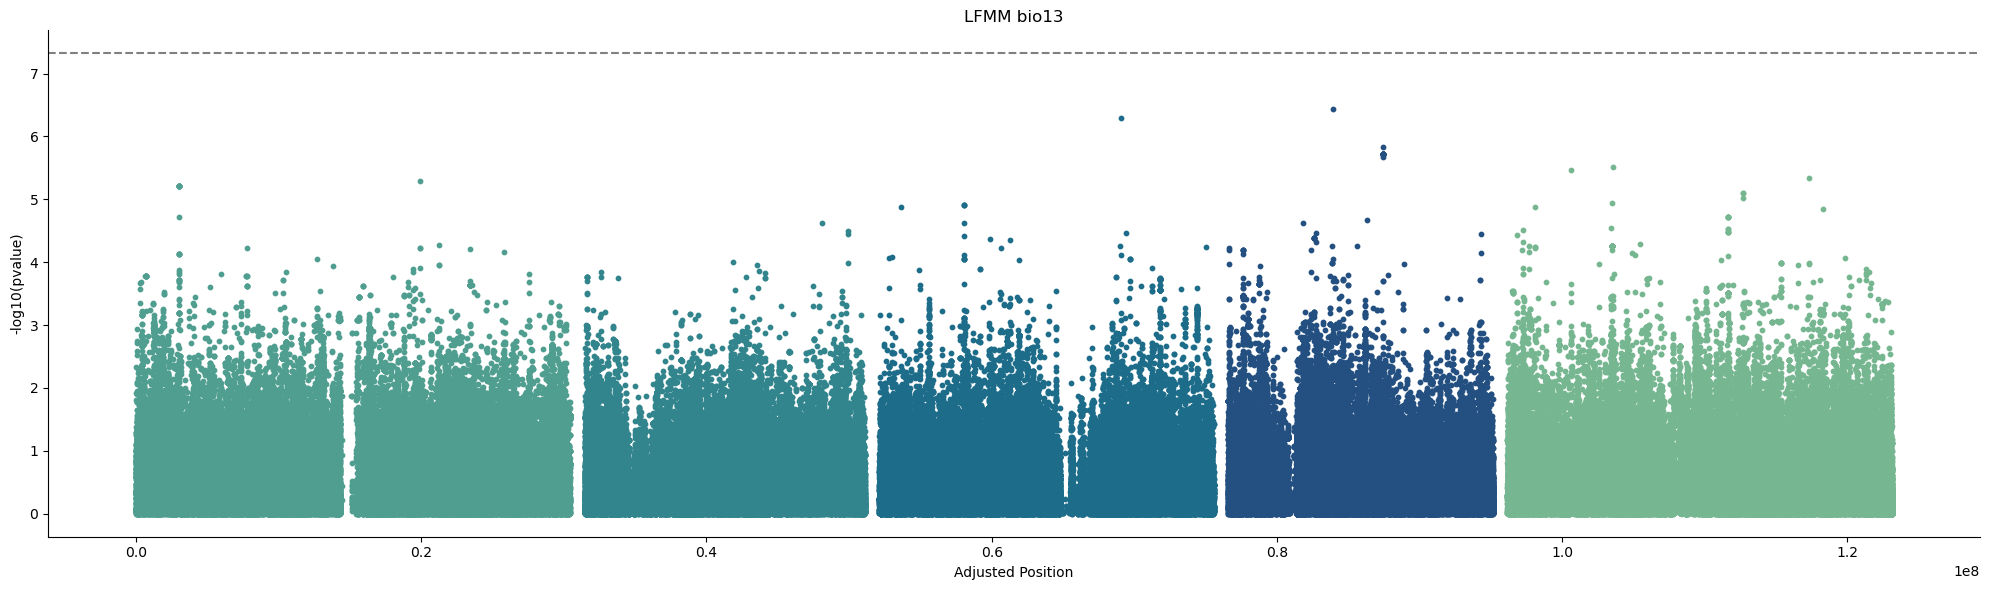

/tmp/ipykernel_1103229/1051856651.py:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


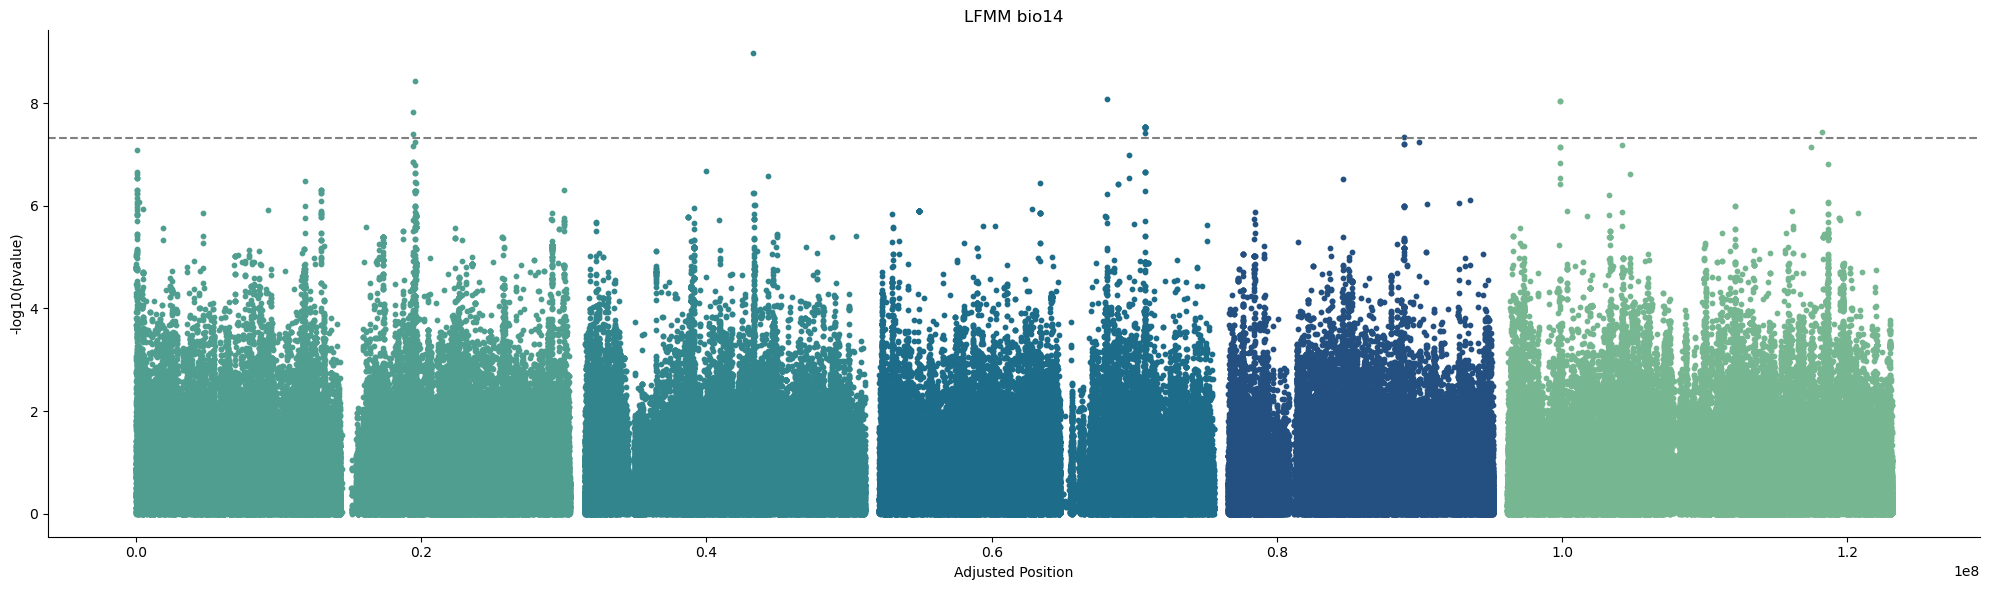

/tmp/ipykernel_1103229/1051856651.py:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


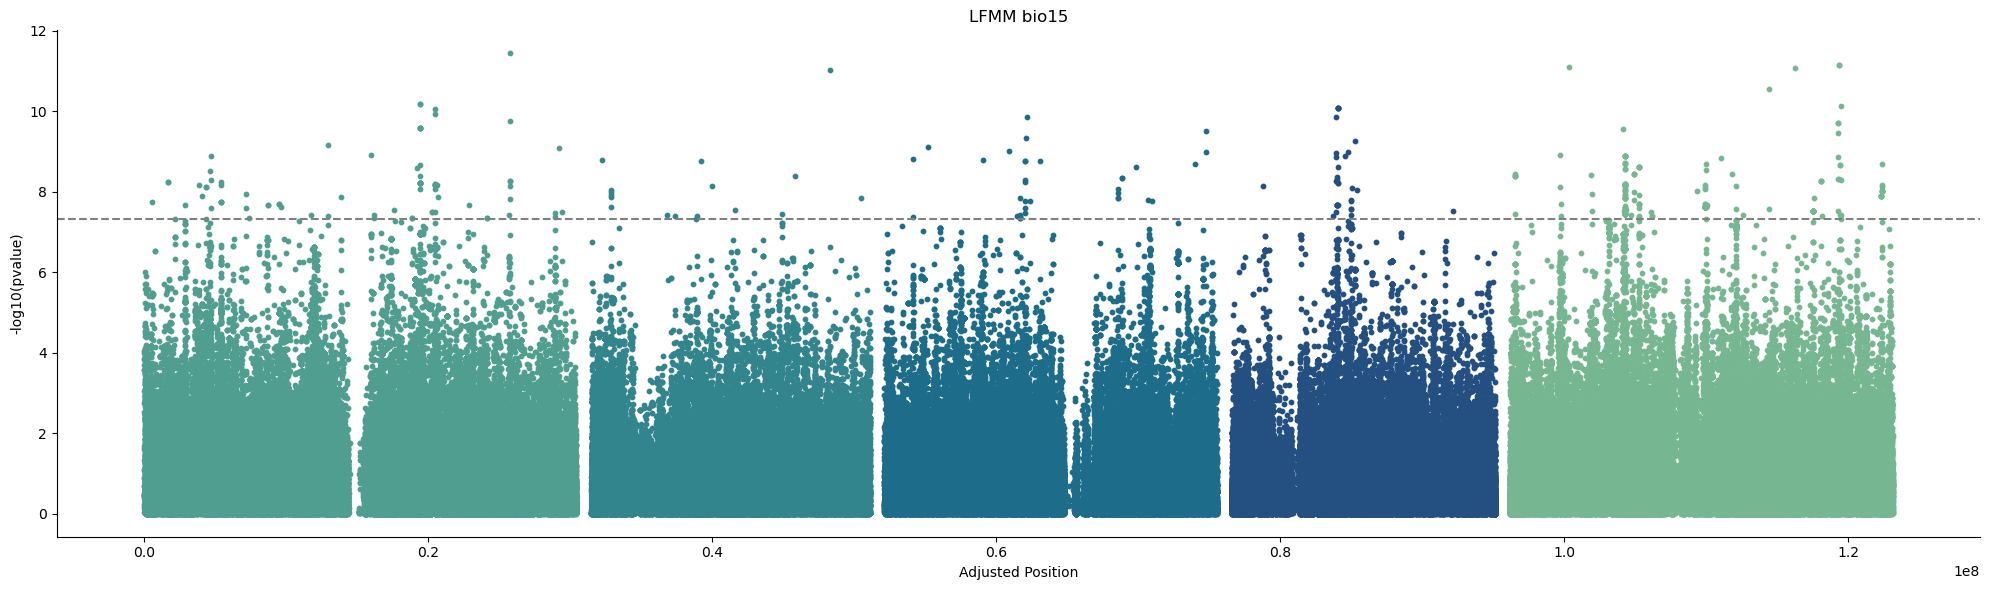

/tmp/ipykernel_1103229/1051856651.py:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


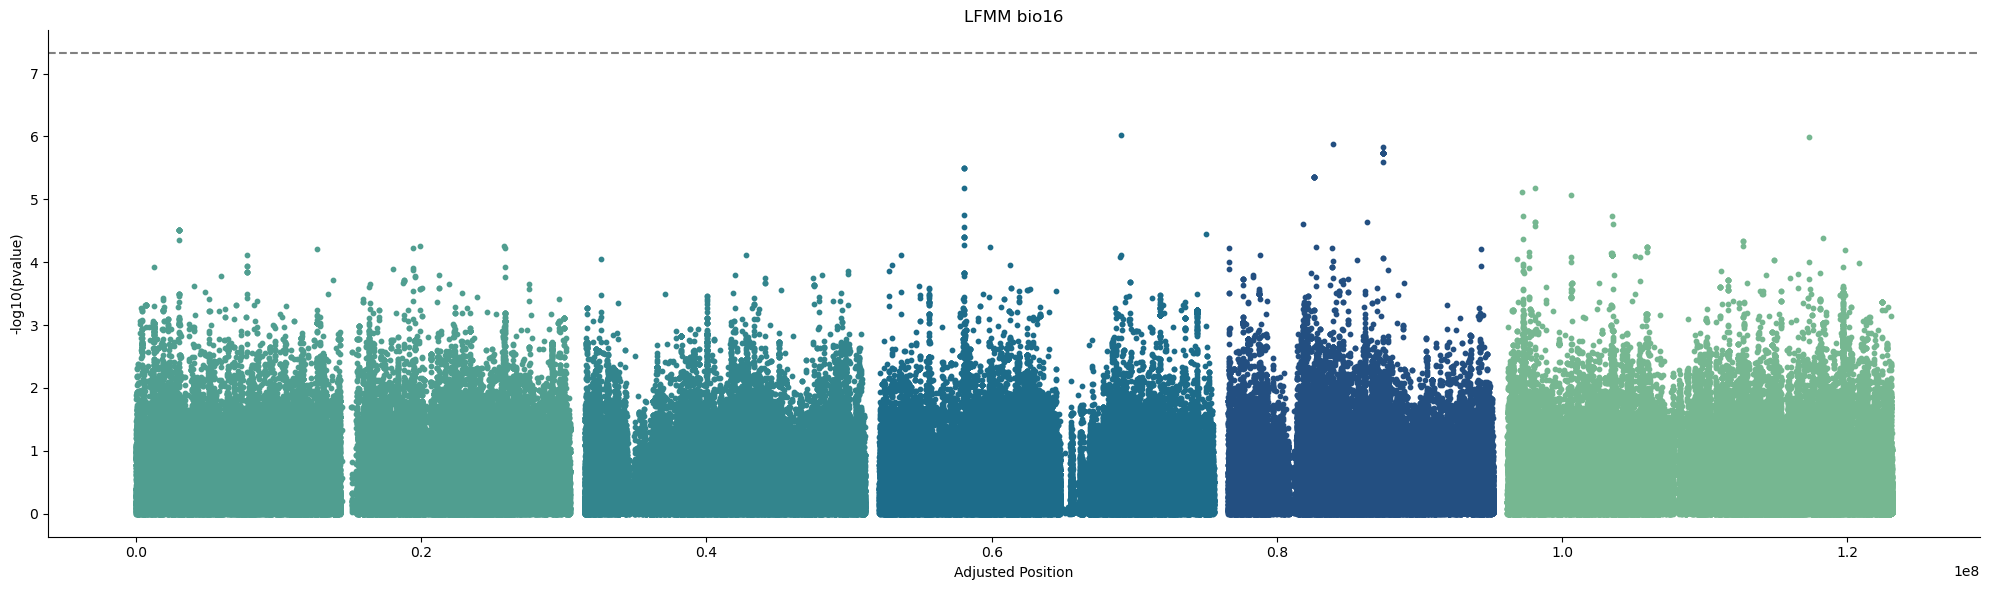

/tmp/ipykernel_1103229/1051856651.py:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


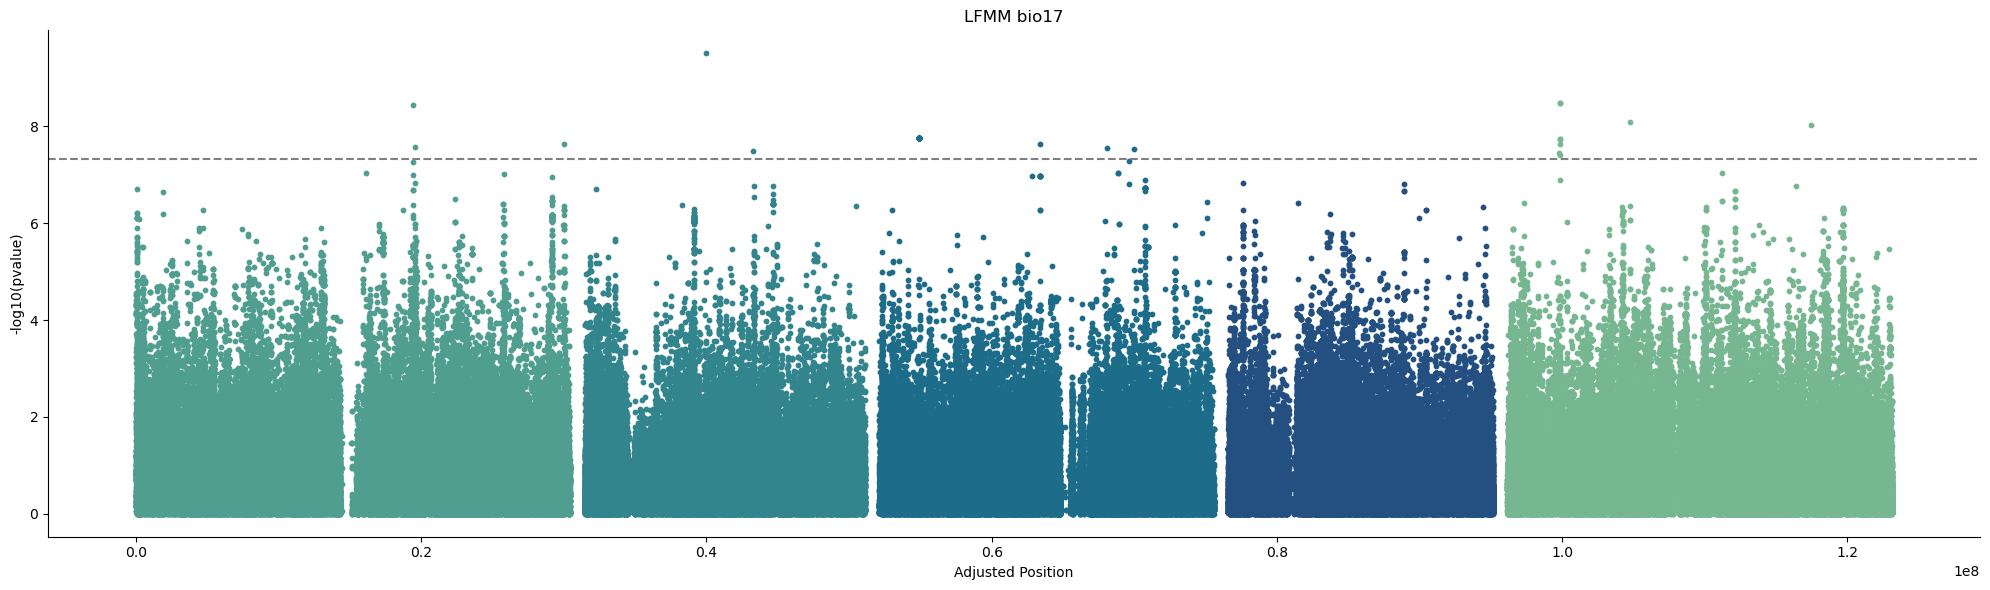

/tmp/ipykernel_1103229/1051856651.py:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


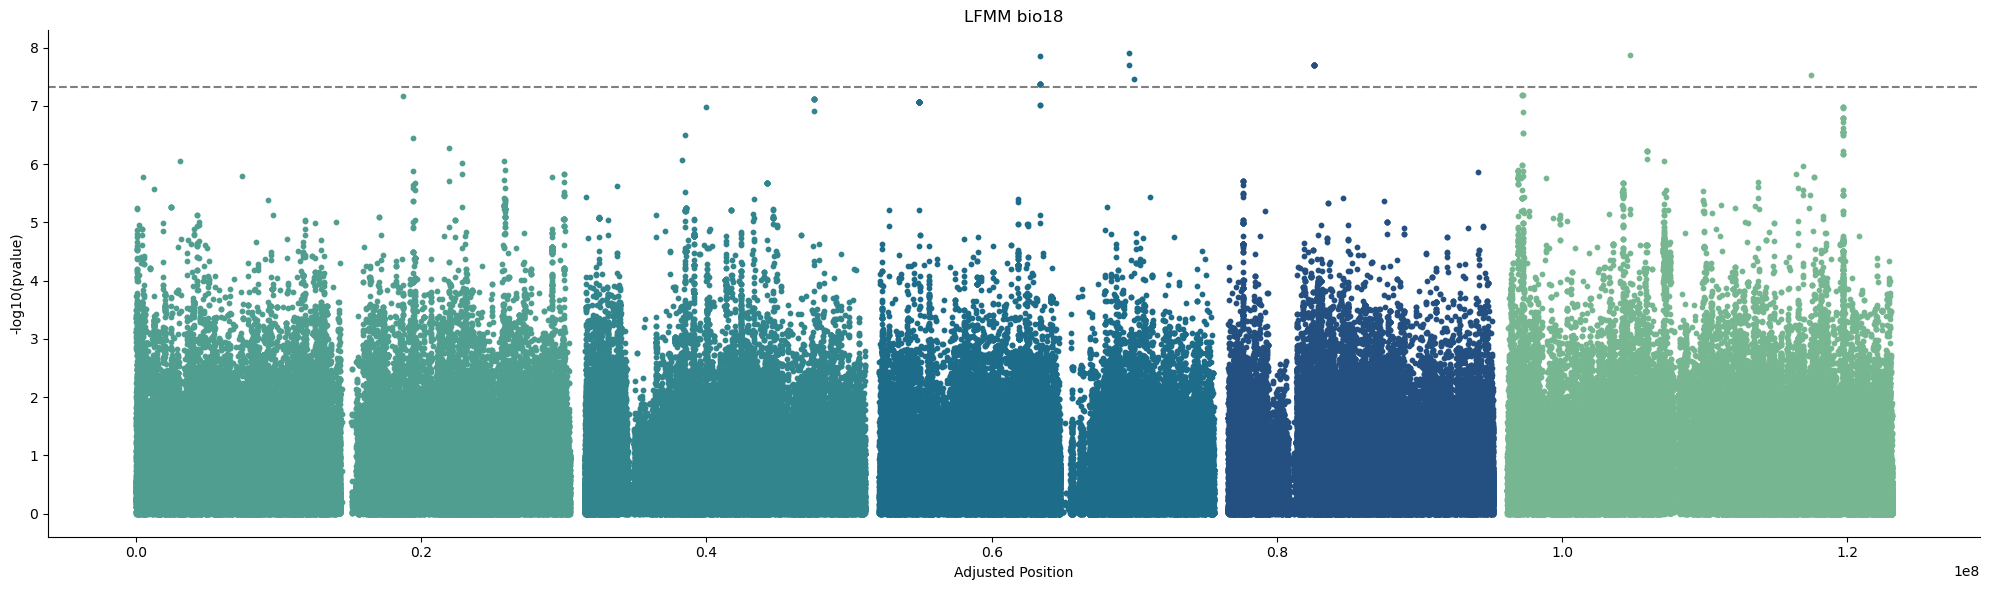

/tmp/ipykernel_1103229/1051856651.py:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


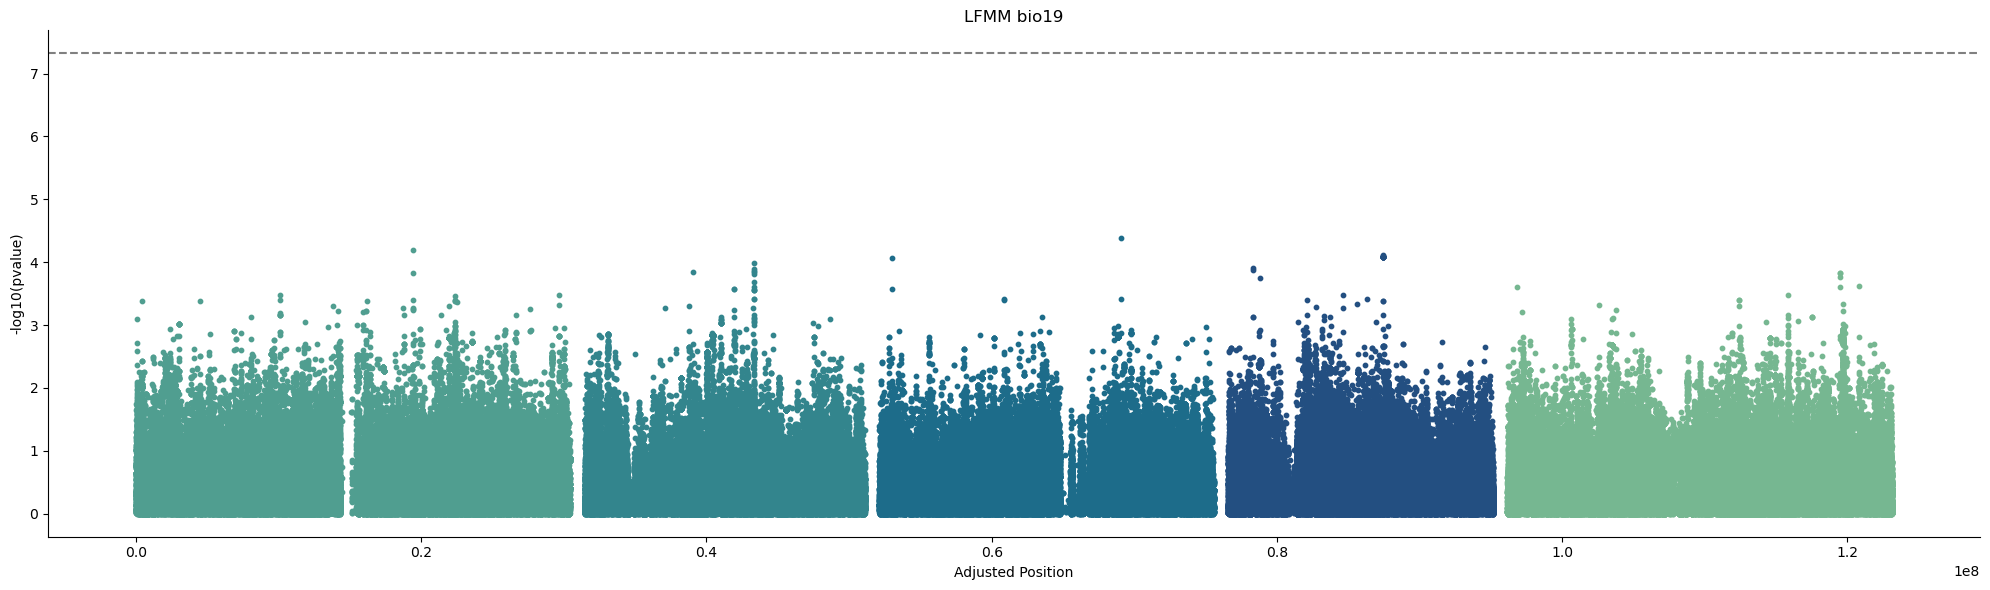

In [18]:
for biovar in biovars:
    #clump= pd.read_csv(f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full/clumping/output/output_clumping_{biovar}.clumped', sep='\s+')
    pvalues_file = wd + f'lfmm_{biovar}_{kvalue}_results.csv'
    
    pvalues = pd.read_csv(pvalues_file)

    pvalues['chrom'] = pvalues['snp_id'].str.split('_').str[0].astype(int)
    pvalues['pos'] = pvalues['snp_id'].str.split('_').str[1].astype(int)
    
    pvalues.columns = ['id', 'pvalue', 'sign', 'block', 'chrom', 'pos']
    
    threshold_value = 0.05 / len(pvalues)
    
    #sm.qqplot(pvalues['pvalue'], line ='45') 
    #py.show() 
    
    df = pvalues.copy()
    
    colors = sns.color_palette("crest", n_colors = 5)
    
    # Parsing chromosome number and position
    df['chromosome'] = df['chrom']
    df['position'] = df['pos']
    df['-log10(pvalue)'] = -np.log10(df['pvalue'])
    
    # Calculate the offset for each chromosome to prevent overlap
    chromosome_offsets = {}
    offset = 0
    for chrom in sorted(df['chromosome'].unique()):
        chromosome_offsets[chrom] = offset
        max_position = df[df['chromosome'] == chrom]['position'].max()
        offset += max_position + 1000000  # Adding 1 million as a buffer between chromosomes
    
    # Apply offsets to positions
    df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)
    
    # Creating the Manhattan plot
    plt.figure(figsize=(20, 6))
    
    for chrom in sorted(df['chromosome'].unique()):
        subset = df[df['chromosome'] == chrom]
        plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)

    # Highlight clumped SNPs
    #clumped_subset = df[df['id'].isin(clump['SNP'])]
    #plt.scatter(clumped_subset['adjusted_position'], clumped_subset['-log10(pvalue)'], s=50, facecolors='none', edgecolors='grey', linewidths=2, label='Clumped SNPs')
    
    # Aesthetics
    plt.xlabel('Adjusted Position')
    plt.ylabel('-log10(pvalue)')
    #plt.title('Manhattan Plot')
    #plt.grid(axis='y')
    #plt.legend(title="Chromosome", bbox_to_anchor=(1.05, 1), loc='upper left')
    ax = plt.gca()  # Get current axes
    ax.spines['top'].set_visible(False)  # Remove the top spine
    ax.spines['right'].set_visible(False)
    # Threshold line (optional)
    threshold = -np.log10(threshold_value)
    plt.axhline(y=threshold, color='grey', linestyle='dashed')
    plt.title(f'LFMM {biovar}')  # Set the title

    # Show the plot
    plt.tight_layout()
    plt.savefig(wd + f'manhattan_{biovar}.png')
    plt.show()

In [ ]:
# Add circles around the specific genes
    for gene in to_mark:
        subset_gene = df[(df['block'] == gene)]
        if not subset_gene.empty:
            adjusted_pos = subset_gene['adjusted_position'].values[0]
            plt.axvline(x=adjusted_pos, color='red', linestyle='--', linewidth=1, label=f'Gene {gene}')